<a href="https://colab.research.google.com/github/Syntax-code/Notes/blob/main/Clustering_K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans
from sklearn import preprocessing

#Example 1

In [ ]:
data = pd.read_csv('/gdrive/MyDrive/csv/3.01.+Country+clusters.csv')
data.head()

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German


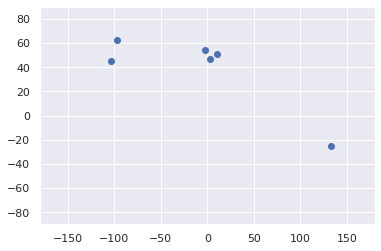

In [ ]:
plt.scatter( data['Longitude'], data['Latitude'])
plt.xlim(-180, 180)
plt.ylim(-90, 90)
plt.show()

In [ ]:
x = data.iloc[:, 1:3]

In [ ]:
k_means = KMeans(3)

In [ ]:
k_means.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
cluster_obt = k_means.fit_predict(x)
cluster_obt

array([2, 2, 1, 1, 1, 0], dtype=int32)

In [ ]:
data_with_clusters = data.copy()
data_with_clusters['Cluster'] = cluster_obt
data_with_clusters

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,English,2
1,Canada,62.40,-96.80,English,2
2,France,46.75,2.40,French,1
3,UK,54.01,-2.53,English,1
4,Germany,51.15,10.40,German,1
5,Australia,-25.45,133.11,English,0


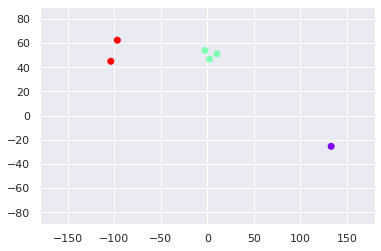

In [ ]:
plt.scatter(data_with_clusters['Longitude'], data_with_clusters['Latitude'], c=data_with_clusters['Cluster'], cmap='rainbow')
plt.xlim(-180, 180)
plt.ylim(-90, 90)
plt.show()

Using another parameter Language

In [ ]:
data_mapped = data.copy()
data_mapped['Language'] = data_mapped['Language'].map({'English':0, 'French':1, 'German':2})
data_mapped.head()

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,0
1,Canada,62.40,-96.80,0
2,France,46.75,2.40,1
3,UK,54.01,-2.53,0
4,Germany,51.15,10.40,2


In [ ]:
x = data_mapped.iloc[:, 3:4]

In [ ]:
k_means = KMeans(3)

In [ ]:
k_means.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
cluster_obt = k_means.fit_predict(x)
cluster_obt

array([0, 0, 2, 0, 1, 0], dtype=int32)

In [ ]:
data_with_clusters = data.copy()
data_with_clusters['Cluster'] = cluster_obt
data_with_clusters

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,English,0
1,Canada,62.40,-96.80,English,0
2,France,46.75,2.40,French,2
3,UK,54.01,-2.53,English,0
4,Germany,51.15,10.40,German,1
5,Australia,-25.45,133.11,English,0


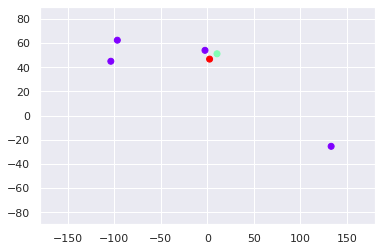

In [ ]:
plt.scatter(data_with_clusters['Longitude'], data_with_clusters['Latitude'], c=data_with_clusters['Cluster'], cmap='rainbow')
plt.xlim(-180, 180)
plt.ylim(-90, 90)
plt.show()

Selecting the number of clusters


WCSS: within cluster sum of square

In [ ]:
k_means.inertia_

0.0

In [ ]:
wcss = []
for i in range(1,7):
  kmeans = KMeans(i)
  kmeans.fit(x)
  wcss_iter = kmeans.inertia_
  wcss.append(wcss_iter)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  after removing the cwd from sys.path.


In [ ]:
wcss

[3.5, 0.5, 0.0, 0.0, 0.0, 0.0]

Elbow method

Text(0, 0.5, 'wcss')

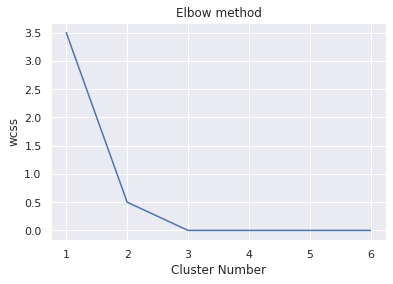

In [ ]:
number_cluster = range(1, 7)
plt.plot(number_cluster, wcss)
plt.title('Elbow method')
plt.xlabel('Cluster Number')
plt.ylabel('wcss')

#Example 2

In [ ]:
data = pd.read_csv('/gdrive/MyDrive/csv/3.12.+Example.csv')
data.head()

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06


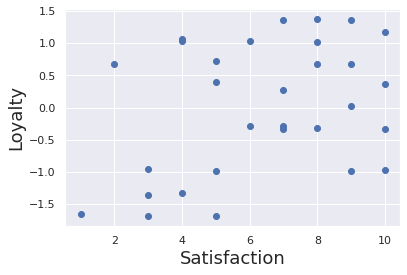

In [ ]:
plt.scatter(data['Satisfaction'], data['Loyalty'])
plt.xlabel('Satisfaction', fontsize=18)
plt.ylabel('Loyalty', fontsize=18)
plt.show()

In [ ]:
x = data.copy()
x_scaled = preprocessing.scale(x)

Elbow method

In [ ]:
wcss = []
for y in range(1, 10):
  kmeans = KMeans(y)
  kmeans.fit(x_scaled)
  wcss.append(kmeans.inertia_)

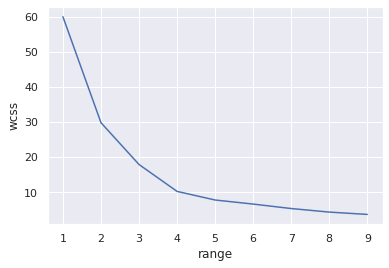

In [ ]:
plt.plot(range(1,10), wcss)
plt.xlabel('range')
plt.ylabel('wcss')
plt.show()

In [ ]:
kmeans = KMeans(4)
kmeans.fit(x_scaled)
clusters = x.copy()
clusters['Cluster'] = kmeans.fit_predict(x_scaled)

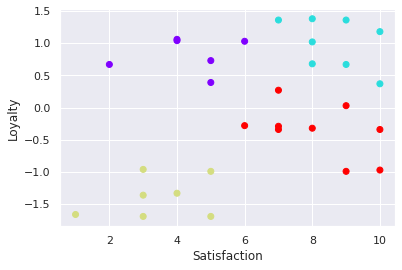

In [ ]:
plt.scatter(clusters['Satisfaction'], clusters['Loyalty'], c=clusters['Cluster'], cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')
plt.show()

#Example 3

In [ ]:
raw_data = pd.read_csv('/gdrive/MyDrive/csv/iris_dataset.csv')
raw_data.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


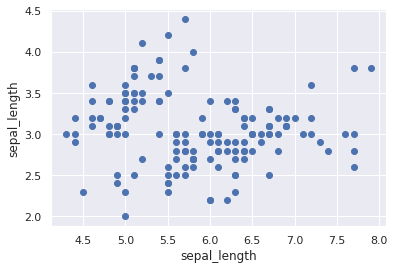

In [ ]:
plt.scatter(raw_data['sepal_length'], raw_data['sepal_width'])
plt.xlabel('sepal_length')
plt.ylabel('sepal_length')
plt.show()

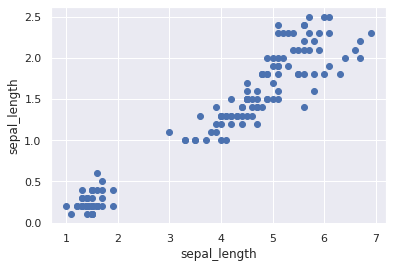

In [ ]:
plt.scatter(raw_data['petal_length'], raw_data['petal_width'])
plt.xlabel('sepal_length')
plt.ylabel('sepal_length')
plt.show()

In [ ]:
x = raw_data.iloc[:,0:2]
x.head()

,sepal_length,sepal_width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [ ]:
x_scaled = preprocessing.scale(x)

In [ ]:
wcss = []
for y in range(1, 10):
  kmeans = kmeans(y)
  kmeans.fit(x_scaled)
  wcss.append(kmeans.inertia_)

In [ ]:
plt.plot(range(1, 10), wcss)
plt.xlabel('range')
plt.ylabel('wcss')

In [ ]:
kmeans = kmeans(3)
kmeans.fit(x_scaled)
cluster = raw_data.copy()
cluster['Cluster'] = kmeans.fit_predict(x_scaled)

In [ ]:
plt.plot(cluster['sepal_length'], cluster['sepal_width'], c = cluster['Cluster'], cmap = 'rainbow')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

In [ ]:
ans_data = pd.read_csv('/gdrive/MyDrive/csv/iris_with_answers.csv')
ans_data.head()

In [ ]:
ans_data[''] = ans_data[''].map({'':0, '':1, '':2})

In [ ]:
plt.plot(ans_data['sepal_length'], ans_data['sepal_width'], c = ans_data[''], cmap = 'rainbow')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()